**The Premier League: An Exploratory Analysis & Identifying PFA Player of the Year Award Winners**
>Written by: Kieran Shand

## Table of Contents
<a id='con'></a>

1. [Table of Contents](#con) 


2. [Introduction](#intro)


3. [Data Wrangling](#wrang)

    3.1 [Gathering Data](#gather)
    
    3.2 [Assessing Data](#assess)
    
    3.3 [Cleaning Data](#clean)
    
    3.4 [Databasing](#databasing)


4. [Data Analysis](#analysis)

    4.1 [Exploratory Analysis](#exploration)
    
    4.2 [K-Means Clustering](#k-means)


5. [Conclusion](#conclusion)


6. [Limitations](#limit)


7. [References](#ref)

## Introduction
<a id='intro'></a>

In this report, I will be completing a data wrangling and analysis on the English Premier League (EPL). The Premier League is the top division of football within England, it was initiated in 1992 and the league is competed by 20 teams each season.

A heavy part of this report is covered in section 3 where I will be completing a thorough Data Wrangling. Within this section I will gather, assess and clean data from an open-source JSON dataset: [English Premier League in-game match data](https://www.kaggle.com/shubhmamp/english-premier-league-match-data). I selected this dataset because it includes in-game player statistics from all matches as well as team statistics, this is something which I was unable to find in any other EPL dataset. The data covers 4 complete years from 2014-2018 and has been collected entirely from [whoscored.com](https://www.whoscored.com). 

Additionally, I will be gathering a dataset of all [PFA Players' Player of the Year](https://en.wikipedia.org/wiki/PFA_Players%27_Player_of_the_Year) award winners scraped from Wikipedia. The PFA Players' Player of the Year award is voted by all Premier League players for the best individual during a season. The award is extremely prestigious and highly sought after, which makes for an interesting study. I decided to collect this data to investigate whether award winners share common attributes using K-Means Clustering. Once all data is assessed and cleaned, it will be stored in a relational database with consistent Primary and Foreign Keys to facilitate future table joins. A relational database is a logical way to store this data as there are multiple dataframes collected which share common keys.

The later Data Analysis will be split into 2. In section 4.1 I will complete an Exploratory Analysis where I will utilise visualisations to gain a greater understanding of the data. I will look into which teams players have won the PFA Player of the Year award most times; I will explore the correlation between goals scored and ball possession and finally I will look into goals scored home and away. In section 4.2 of the Data Analysis I will utilise K-Means Clustering to create a model which groups Premier League players by attributes. Ultimately, I would like to understand whether PFA Player of the Year winners share attributes and a common cluster. If the award winners share a common cluster, perhaps the model can be used to help predict future winners of the award.

Finally, a well documented conclusion will form a summary of the main findings of this report.

## Data Wrangling
<a id='wrang'></a>

### Gathering Data
<a id='gather'></a>

In this section I will gather and iterate through the open-source JSON dataset to convert it to a Pandas Dataframe. I will subsequently scrape data from Wikipedia to form a Pandas Dataframe. 

***Loading Packages***

In [1]:
import json
import os
import glob
import pandas as pd
import numpy as np
from zipfile import ZipFile
from bs4 import BeautifulSoup
import requests
import string
import sqlite3
from sqlalchemy import create_engine
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
from collections import OrderedDict

%matplotlib inline
%load_ext sql

#### Gathering Data From JSON Dataset

***Changing Directory and Identifying File Paths***

In [2]:
#Changing working directory to facilitate relative paths
os.chdir(r"    ENTER FILE PATH OF DOWNLOADED KAGGLE DATASET    /datafilev2/datafile/")

In [3]:
#Create file paths
#(Pawar, 2018)

file_paths = glob.glob('**/*.json', recursive=True)

match_stats_file_paths = []
season_stats_file_paths = []

for file in file_paths:
    if 'season_match_stats' in file:
        match_stats_file_paths.append(file)
    else: season_stats_file_paths.append(file)

***Creating File Names***

In [4]:
match_stats_file_names = []
for file in match_stats_file_paths:
    x = file.replace('\\','_')
    x = x.replace('-', '_')
    x = x.replace('.json', '')
    x = x.replace('season1', 'season_1')
    x = x.replace('_season_', '_')
    match_stats_file_names.append(x)
    
season_stats_file_names = []
for file in season_stats_file_paths:
    x = file.replace('\\','_')
    x = x.replace('-', '_')
    x = x.replace('.json', '')
    x = x.replace('season1', 'season_1')
    x = x.replace('_season_', '_')
    season_stats_file_names.append(x)

***Processing Match Stats JSON data into Dataframe***

In [5]:
#Load match stats JSON into dataframe
for file, name in zip(match_stats_file_paths, match_stats_file_names):
    globals()[name] = json.load(open(file, 'r', encoding='utf-8'))
    globals()[name] = pd.DataFrame.from_dict(globals()[name], orient='index')

***Processing Season Stats JSON data into Dataframe***

In [6]:
#Open season stats JSON
for file, name in zip(season_stats_file_paths, season_stats_file_names):
    globals()[name] = json.load(open(file, 'r', encoding='utf-8'))

In [7]:
#Load 14/15 season stats into dataframe
key = season_14_15_stats.keys()
df = pd.DataFrame()

for k in key:
    
    for t_key in season_14_15_stats[k]:
        
        x = pd.json_normalize(season_14_15_stats[k][t_key]['team_details'])
        y = pd.json_normalize(season_14_15_stats[k][t_key]['aggregate_stats'])
        z = pd.concat([x, y], axis =1)
        df = pd.concat([df, z], sort=False)
        
season_14_15_stats = df

In [8]:
#Load 15/16 season stats into dataframe
key = season_15_16_stats.keys()
df = pd.DataFrame()

for k in key:
    
    for t_key in season_15_16_stats[k]:
        
        x = pd.json_normalize(season_15_16_stats[k][t_key]['team_details'])
        y = pd.json_normalize(season_15_16_stats[k][t_key]['aggregate_stats'])
        z = pd.concat([x, y], axis =1)
        df = pd.concat([df, z], sort=False)
        
season_15_16_stats = df

In [9]:
#Load 16/17 season stats into dataframe
key = season_16_17_stats.keys()
df = pd.DataFrame()

for k in key:
    
    for t_key in season_16_17_stats[k]:
        
        x = pd.json_normalize(season_16_17_stats[k][t_key]['team_details'])
        y = pd.json_normalize(season_16_17_stats[k][t_key]['aggregate_stats'])
        z = pd.concat([x, y], axis =1)
        df = pd.concat([df, z], sort=False)
        
season_16_17_stats = df

In [10]:
#Load 17/18 season stats into dataframe
key = season_17_18_stats.keys()
df = pd.DataFrame()

for k in key:
    
    for t_key in season_17_18_stats[k]:
        
        x = pd.json_normalize(season_17_18_stats[k][t_key]['team_details'])
        y = pd.json_normalize(season_17_18_stats[k][t_key]['aggregate_stats'])
        z = pd.concat([x, y], axis =1)
        df = pd.concat([df, z], sort=False)
        
season_17_18_stats = df

***Processing Players Stats***

In [11]:
#Load 14/15 player stats into dataframe
#Using OrderedDict while loading because it preserves the order of data in dictionary

fp = open('season14-15//season_stats.json', 'rb')
data = json.load(fp, object_pairs_hook=OrderedDict)
fp.close()

# List of dictionaries that will be converted to a Dataframe.
player_stats_list = []
player_details_list = []

for game_key, game in data.items():
    
    for team_key, team_stats in game.items():       
       
        for player_name, player in team_stats["Player_stats"].items():
            player_stats = {"player_name": player_name, "match_id": game_key, "team_id" : team_key}

            for match_stat_type, stat in player["Match_stats"].items():
                player_stats[match_stat_type] = stat
            
            player_stats_list.append(player_stats)            
           
            for player_detail_type, detail in player["player_details"].items():
                player_stats[player_detail_type] = detail
            
            player_details_list.append(player_stats)
            
season_14_15_player_stats = pd.DataFrame(player_details_list)

In [12]:
#Load 15/16 player stats into dataframe
#Using OrderedDict while loading because it preserves the order of data in dictionary

fp = open('season15-16//season_stats.json', 'rb')
data = json.load(fp, object_pairs_hook=OrderedDict)
fp.close()

# List of dictionaries that will be converted to a Dataframe.
player_stats_list = []
player_details_list = []

for game_key, game in data.items():
    
    for team_key, team_stats in game.items():       
       
        for player_name, player in team_stats["Player_stats"].items():
            player_stats = {"player_name": player_name, "match_id": game_key, "team_id" : team_key}

            for match_stat_type, stat in player["Match_stats"].items():
                player_stats[match_stat_type] = stat
            
            player_stats_list.append(player_stats)            
           
            for player_detail_type, detail in player["player_details"].items():
                player_stats[player_detail_type] = detail
            
            player_details_list.append(player_stats)
            
season_15_16_player_stats = pd.DataFrame(player_details_list)

In [13]:
#Load 16/17 player stats into dataframe
#Using OrderedDict while loading because it preserves the order of data in dictionary

fp = open('season16-17//season_stats.json', 'rb')
data = json.load(fp, object_pairs_hook=OrderedDict)
fp.close()

# List of dictionaries that will be converted to a Dataframe.
player_stats_list = []
player_details_list = []

for game_key, game in data.items():
    
    for team_key, team_stats in game.items():       
       
        for player_name, player in team_stats["Player_stats"].items():
            player_stats = {"player_name": player_name, "match_id": game_key, "team_id" : team_key}

            for match_stat_type, stat in player["Match_stats"].items():
                player_stats[match_stat_type] = stat
            
            player_stats_list.append(player_stats)            
           
            for player_detail_type, detail in player["player_details"].items():
                player_stats[player_detail_type] = detail
            
            player_details_list.append(player_stats)
            
season_16_17_player_stats = pd.DataFrame(player_details_list)

In [14]:
#Load 17/18 player stats into dataframe
#Using OrderedDict while loading because it preserves the order of data in dictionary

fp = open('season17-18//season_stats.json', 'rb')
data = json.load(fp, object_pairs_hook=OrderedDict)
fp.close()

# List of dictionaries that will be converted to a Dataframe.
player_stats_list = []
player_details_list = []

for game_key, game in data.items():
    
    for team_key, team_stats in game.items():       
       
        for player_name, player in team_stats["Player_stats"].items():
            player_stats = {"player_name": player_name, "match_id": game_key, "team_id" : team_key}

            for match_stat_type, stat in player["Match_stats"].items():
                player_stats[match_stat_type] = stat
            
            player_stats_list.append(player_stats)            
           
            for player_detail_type, detail in player["player_details"].items():
                player_stats[player_detail_type] = detail
            
            player_details_list.append(player_stats)
            
season_17_18_player_stats = pd.DataFrame(player_details_list)

#### Gathering Data from Wikipedia
<a id='gather'></a>

***Collect PFA Player of the Year Wikipedia Page Content***

In [15]:
#Collecting the url and making the soup
#(Wikipedia, 2020)

r  = requests.get("https://en.wikipedia.org/wiki/PFA_Players%27_Player_of_the_Year")
data = r.text
soup = BeautifulSoup(data, "html.parser")

#Inspecting tags
print(soup.prettify()[:500])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   PFA Players' Player of the Year - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"X9fufw


***Creating Dataframe***

In [16]:
df = pd.DataFrame()
l = []

#Pulling all table rows from identified table and appending to a dataframe
table = soup.find('table', attrs={'class': 'sortable wikitable' ,'style':'text-align: center;'})
table_rows = table.find_all('tr')

for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]         
    l.append(row)

pfa_award_winners = df.append(l)

#### Combining Data

***Duplicate Files for Due Diligence***

In [17]:
pfa_award_winners_clean = pfa_award_winners.copy()

season_14_15_stats_clean = season_14_15_stats.copy()
season_14_15_match_stats_clean = season_14_15_match_stats.copy()
season_14_15_player_stats_clean = season_14_15_player_stats.copy()

season_15_16_stats_clean = season_15_16_stats.copy()
season_15_16_match_stats_clean = season_15_16_match_stats.copy()
season_15_16_player_stats_clean = season_15_16_player_stats.copy()

season_16_17_stats_clean = season_16_17_stats.copy()
season_16_17_match_stats_clean = season_16_17_match_stats.copy()
season_16_17_player_stats_clean = season_16_17_player_stats.copy()

season_17_18_stats_clean = season_17_18_stats.copy()
season_17_18_match_stats_clean = season_17_18_match_stats.copy()
season_17_18_player_stats_clean = season_17_18_player_stats.copy()

***Combine dataframes***

It is not necessary for there to be soo many dataframes. I will concatenate and re-organise to leave just 3 dataframes. By setting the unique match_id as the index of each of the 3 dataframes, I will ensure that all rows can be joined.

In [18]:
#Concatenate all season stats dataframes to create match_details_clean 
#Adding match_id as the dataframe index
#Repeating match_id as season stats collects home and away teams in independent rows
#(stackoverflow, 2018)

index = [season_14_15_match_stats_clean.index]
index = np.repeat(index,2)
season_14_15_stats_clean['match_id'] = index
season_14_15_stats_clean.reset_index(inplace=True)
season_14_15_stats_clean.drop('index', axis=1, inplace=True)
season_14_15_stats_clean.set_index('match_id', inplace=True)

index = [season_15_16_match_stats.index]
index = np.repeat(index,2)
season_15_16_stats_clean['match_id'] = index
season_15_16_stats_clean.reset_index(inplace=True)
season_15_16_stats_clean.drop('index', axis=1, inplace=True)
season_15_16_stats_clean.set_index('match_id', inplace=True)

index = [season_16_17_match_stats.index]
index = np.repeat(index,2)
season_16_17_stats_clean['match_id'] = index
season_16_17_stats_clean.reset_index(inplace=True)
season_16_17_stats_clean.drop('index', axis=1, inplace=True)
season_16_17_stats_clean.set_index('match_id', inplace=True)

index = [season_17_18_match_stats.index]
index = np.repeat(index,2)
season_17_18_stats_clean['match_id'] = index
season_17_18_stats_clean.reset_index(inplace=True)
season_17_18_stats_clean.drop('index', axis=1, inplace=True)
season_17_18_stats_clean.set_index('match_id', inplace=True)


match_details_clean = pd.concat([season_14_15_stats_clean, season_15_16_stats_clean, season_16_17_stats_clean, season_17_18_stats_clean])

In [19]:
#Concatenate all match stats dataframes to create match_results_clean 
#Renaming index as match_id for consistency with other dataframes

season_14_15_match_stats_clean.index.rename('match_id', inplace=True)
season_15_16_match_stats_clean.index.rename('match_id', inplace=True)
season_16_17_match_stats_clean.index.rename('match_id', inplace=True)
season_17_18_match_stats_clean.index.rename('match_id', inplace=True)


match_results_clean = pd.concat([season_14_15_match_stats_clean, season_15_16_match_stats_clean, season_16_17_match_stats_clean, season_17_18_match_stats_clean])

In [20]:
#Concatenate all season player stats dataframes to create player_performance_clean 
#Adding team_id, date and match_id to facilitate joining with other dataframes
#Setting match_id as index for consistency with other dataframes

ids = season_14_15_stats_clean[['team_id']]
ids.reset_index(inplace=True)
season_14_15_player_stats_clean = pd.merge(ids, season_14_15_player_stats_clean,  how='left', left_on=['team_id', 'match_id'], right_on = ['team_id', 'match_id'])
season_14_15_player_stats_clean.reset_index(inplace=True)
season_14_15_player_stats_clean.drop('index', axis=1, inplace=True)
season_14_15_player_stats_clean.set_index('match_id', inplace=True)

ids = season_15_16_stats_clean[['team_id']]
ids.reset_index(inplace=True)
season_15_16_player_stats_clean = pd.merge(ids, season_15_16_player_stats_clean,  how='left', left_on=['team_id', 'match_id'], right_on = ['team_id', 'match_id'])
season_15_16_player_stats_clean.reset_index(inplace=True)
season_15_16_player_stats_clean.drop('index', axis=1, inplace=True)
season_15_16_player_stats_clean.set_index('match_id', inplace=True)

ids = season_16_17_stats_clean[['team_id']]
ids.reset_index(inplace=True)
season_16_17_player_stats_clean = pd.merge(ids, season_16_17_player_stats_clean,  how='left', left_on=['team_id', 'match_id'], right_on = ['team_id', 'match_id'])
season_16_17_player_stats_clean.reset_index(inplace=True)
season_16_17_player_stats_clean.drop('index', axis=1, inplace=True)
season_16_17_player_stats_clean.set_index('match_id', inplace=True)

ids = season_17_18_stats_clean[['team_id']]
ids.reset_index(inplace=True)
season_17_18_player_stats_clean = pd.merge(ids, season_17_18_player_stats_clean,  how='left', left_on=['team_id', 'match_id'], right_on = ['team_id', 'match_id'])
season_17_18_player_stats_clean.reset_index(inplace=True)
season_17_18_player_stats_clean.drop('index', axis=1, inplace=True)
season_17_18_player_stats_clean.set_index('match_id', inplace=True)


player_performance_clean = pd.concat([season_14_15_player_stats_clean, season_15_16_player_stats_clean, season_16_17_player_stats_clean, season_17_18_player_stats_clean])

### Assessing Data
<a id='assess'></a>

I will now assess the data both visually and programmatically for quality and tidiness issues. I will note my observations as Action Points. This will later serve as a check-mark system when cleaning the data.

***Visual Assessment***

In [21]:
match_details_clean

#Inconsistent team rating decimal places    
#Check date format

,team_id,team_name,team_rating,date,att_goal_low_left,won_contest,possession_percentage,total_throws,att_miss_high_left,blocked_scoring_att,...,att_goal_high_right,att_sv_high_centre,att_post_high,post_scoring_att,att_sv_high_right,penalty_save,att_pen_goal,att_post_right,att_post_left,att_goal_high_centre
match_id,,,,,,,,,,,,,,,,,,,,,
829513,13,Arsenal,7.015,16/08/2014,1,12,76,21,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829513,162,Crystal Palace,6.62857142857143,16/08/2014,1,7,24,18,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829514,184,Burnley,6.29857142857143,18/08/2014,NaN,3,38.6,35,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829514,15,Chelsea,7.13428571428571,18/08/2014,2,12,61.4,29,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829515,14,Leicester,6.71428571428571,16/08/2014,NaN,6,36.7,12,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190373,27,Watford,6.17071428571429,11/03/2018,NaN,7,40.3,28,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190367,32,Manchester United,7.31928571428571,03/02/2018,1,27,74.3,23,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190367,166,Huddersfield,6.40857142857143,03/02/2018,NaN,4,25.7,8,NaN,3,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [22]:
match_results_clean

#Inconsistent date column title with match_details_clean
#Check date format
#Half time and full time score columns require splitting

,home_team_id,away_team_id,home_team_name,away_team_name,date_string,half_time_score,full_time_score
match_id,,,,,,,
829513,13,162,Arsenal,Crystal Palace,16/08/2014 17:30:00,1 : 1,2 : 1
829514,184,15,Burnley,Chelsea,18/08/2014 20:00:00,1 : 3,1 : 3
829515,14,31,Leicester,Everton,16/08/2014 15:00:00,1 : 2,2 : 2
829516,26,18,Liverpool,Southampton,17/08/2014 13:30:00,1 : 0,2 : 1
829517,32,259,Manchester United,Swansea,16/08/2014 12:45:00,0 : 1,1 : 2
...,...,...,...,...,...,...,...
1190429,26,27,Liverpool,Watford,17/03/2018 17:30:00,2 : 0,5 : 0
1190415,29,27,West Ham,Watford,10/02/2018 15:00:00,1 : 0,2 : 0
1190373,13,27,Arsenal,Watford,11/03/2018 13:30:00,1 : 0,3 : 0


In [23]:
player_performance_clean

,team_id,player_name,touches,saves,total_pass,aerial_won,formation_place,accurate_pass,player_id,player_position_value,...,six_yard_block,post_scoring_att,att_pen_target,penalty_save,penalty_conceded,clearance_off_line,att_pen_goal,att_pen_miss,own_goals,att_pen_post
match_id,,,,,,,,,,,,,,,,,,,,,
829513,13,Wojciech Szczesny,20,1,13,1,1,11,73379,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829513,13,Calum Chambers,111,NaN,93,2,5,86,124316,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829513,13,Mathieu Debuchy,92,NaN,54,5,2,44,11367,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829513,13,Kieran Gibbs,44,NaN,34,1,3,26,27550,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829513,13,Laurent Koscielny,80,NaN,62,2,6,60,30051,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190401,167,Yaya Touré,NaN,NaN,NaN,NaN,0,NaN,14053,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190401,167,Claudio Bravo,NaN,NaN,NaN,NaN,0,NaN,14199,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190401,167,John Stones,NaN,NaN,NaN,NaN,0,NaN,101374,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
pfa_award_winners.head(10)

#No columns titles
#None values
#Columns without values
#No player ID
#Players who have won the award twice include (2) in player name

,0,1,2,3,4,5
0,None,None,None,None,None,None
1,1973–74,,Norman Hunter,Leeds United,,\n
2,1974–75,,Colin Todd,Derby County,,\n
3,1975–76,,Pat Jennings,Tottenham Hotspur,,[17]\n
4,1976–77,,Andy Gray,Aston Villa,YPY,[18]\n
5,1977–78,,Peter Shilton,Nottingham Forest,,\n
6,1978–79,,Liam Brady,Arsenal,,[19]\n
7,1979–80,,Terry McDermott,Liverpool,FWA,[20]\n
8,1980–81,,John Wark,Ipswich Town,,\n
9,1981–82,,Kevin Keegan,Southampton,,\n


***Programmatic Assessment***

In [25]:
all_columns = pd.Series(list(match_details_clean) + list(match_results_clean) + list(player_performance_clean))
all_columns[all_columns.duplicated()]

#Several columns duplicated unneccessarily across 3 dataframes 

50                team_id
54             total_pass
55             aerial_won
57          accurate_pass
62           total_tackle
63            aerial_lost
66      total_scoring_att
68                  goals
69            won_contest
70    blocked_scoring_att
78       post_scoring_att
80           penalty_save
83           att_pen_goal
dtype: object

In [26]:
sum(match_details_clean.duplicated())

#No duplicate records

0

In [27]:
sum(match_results_clean.duplicated())

#No duplicate records

0

In [28]:
sum(player_performance_clean.duplicated())

#All records are duplicated

11572

In [29]:
sum(pfa_award_winners_clean.duplicated())

#No duplicate records

0

In [30]:
match_details_clean.info()

#Date format
#Several columns should be stored as either int or float

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 829513 to 1190401
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   team_id                3040 non-null   object
 1   team_name              3040 non-null   object
 2   team_rating            3040 non-null   object
 3   date                   3040 non-null   object
 4   att_goal_low_left      978 non-null    object
 5   won_contest            3038 non-null   object
 6   possession_percentage  3040 non-null   object
 7   total_throws           3040 non-null   object
 8   att_miss_high_left     1018 non-null   object
 9   blocked_scoring_att    2837 non-null   object
 10  total_scoring_att      3039 non-null   object
 11  att_sv_low_left        1324 non-null   object
 12  total_tackle           3040 non-null   object
 13  att_miss_high_right    1185 non-null   object
 14  aerial_won             3040 non-null   object
 15  att_miss_right    

In [31]:
match_results_clean.info()

#Date format
#Several columns should be stored as either int or float

<class 'pandas.core.frame.DataFrame'>
Index: 1520 entries, 829513 to 1190401
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   home_team_id     1520 non-null   object
 1   away_team_id     1520 non-null   object
 2   home_team_name   1520 non-null   object
 3   away_team_name   1520 non-null   object
 4   date_string      1520 non-null   object
 5   half_time_score  1520 non-null   object
 6   full_time_score  1520 non-null   object
dtypes: object(7)
memory usage: 95.0+ KB


In [32]:
player_performance_clean.info()

#Several columns should be stored as either int or float

<class 'pandas.core.frame.DataFrame'>
Index: 54708 entries, 829513 to 1190401
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   team_id                54708 non-null  object
 1   player_name            54708 non-null  object
 2   touches                41647 non-null  object
 3   saves                  2799 non-null   object
 4   total_pass             41431 non-null  object
 5   aerial_won             22634 non-null  object
 6   formation_place        54708 non-null  object
 7   accurate_pass          41159 non-null  object
 8   player_id              54708 non-null  object
 9   player_position_value  54708 non-null  object
 10  player_position_info   54708 non-null  object
 11  player_rating          54708 non-null  object
 12  total_tackle           25045 non-null  object
 13  aerial_lost            23989 non-null  object
 14  fouls                  20831 non-null  object
 15  yellow_card      

In [33]:
pfa_award_winners_clean.info()

#Several columns should be stored as either int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       47 non-null     object
 1   1       47 non-null     object
 2   2       47 non-null     object
 3   3       47 non-null     object
 4   4       47 non-null     object
 5   5       47 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


***Action Points***

`match_details_clean`

    - Column formats
    - Inconsistent team rating decimal places    
    - Column duplicates
    
`match_results_clean`

    - Column formats
    - Inconsistent date column title
    - Column duplicates
    
`player_performance_clean`

    - Duplicate records
    - Column formats
    
`pfa_award_winners`

    - None values
    - Columns without values
    - Columns titles
    - Column formats
    - Player ID
    - (2) included in player name 

### Cleaning Data
<a id='clean'></a>

Through leveraging the action points noted in the Assessing Data section, I will chronologically clean all dataframes.

#### `match_details_clean`

*Define:*

    - Several columns have incorrect format types
    - Team Rating should be rounded to 1 decimal
    - I will correct the date types using astype and to_numeric. I will use round to define the number of decimals for the Team Rating

(Moffitt, 2018)

*Code:*

In [34]:
match_details_clean['team_id'] = match_details_clean['team_id'].astype('int')
match_details_clean['team_name'] = match_details_clean['team_name'].astype('str')
match_details_clean['team_rating'] = match_details_clean['team_rating'].astype('float').round(decimals=1)

In [35]:
match_details_clean[match_details_clean.columns[4:42]] = match_details_clean[match_details_clean.columns[4:42]].apply(pd.to_numeric) 

*Test:*

In [36]:
match_details_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 829513 to 1190401
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team_id                3040 non-null   int32  
 1   team_name              3040 non-null   object 
 2   team_rating            3040 non-null   float64
 3   date                   3040 non-null   object 
 4   att_goal_low_left      978 non-null    float64
 5   won_contest            3038 non-null   float64
 6   possession_percentage  3040 non-null   float64
 7   total_throws           3040 non-null   int64  
 8   att_miss_high_left     1018 non-null   float64
 9   blocked_scoring_att    2837 non-null   float64
 10  total_scoring_att      3039 non-null   float64
 11  att_sv_low_left        1324 non-null   float64
 12  total_tackle           3040 non-null   int64  
 13  att_miss_high_right    1185 non-null   float64
 14  aerial_won             3040 non-null   int64  
 15  a

*Define:*

    - The date column is redundant as it will be stored in match_results
    - I will remove the columns using drop
    
*Code:*

In [37]:
match_details_clean.drop('date', axis=1, inplace=True)

*Test*

In [38]:
match_details_clean.columns

Index(['team_id', 'team_name', 'team_rating', 'att_goal_low_left',
       'won_contest', 'possession_percentage', 'total_throws',
       'att_miss_high_left', 'blocked_scoring_att', 'total_scoring_att',
       'att_sv_low_left', 'total_tackle', 'att_miss_high_right', 'aerial_won',
       'att_miss_right', 'att_sv_low_centre', 'aerial_lost', 'accurate_pass',
       'total_pass', 'won_corners', 'shot_off_target', 'ontarget_scoring_att',
       'goals', 'att_miss_left', 'fk_foul_lost', 'att_sv_low_right',
       'att_goal_low_centre', 'total_offside', 'att_sv_high_left',
       'att_goal_high_left', 'att_miss_high', 'att_goal_low_right',
       'att_goal_high_right', 'att_sv_high_centre', 'att_post_high',
       'post_scoring_att', 'att_sv_high_right', 'penalty_save', 'att_pen_goal',
       'att_post_right', 'att_post_left', 'att_goal_high_centre'],
      dtype='object')

#### `match_results_clean`

*Define:*
    
    - Several columns formats are incorrect
    - I will correct the date types using astype and to_datetime
    
*Code:*

In [39]:
match_results_clean[['home_team_id', 'away_team_id']] = match_results_clean[['home_team_id', 'away_team_id']].astype('int')

In [40]:
match_results_clean['date_string'] = pd.to_datetime(match_results_clean['date_string'],errors='coerce')

In [41]:
match_results_clean[['half_time_score', 'full_time_score']] = match_results_clean[['half_time_score', 'full_time_score']].astype('str')

*Test:*

In [42]:
match_results_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1520 entries, 829513 to 1190401
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   home_team_id     1520 non-null   int32         
 1   away_team_id     1520 non-null   int32         
 2   home_team_name   1520 non-null   object        
 3   away_team_name   1520 non-null   object        
 4   date_string      1519 non-null   datetime64[ns]
 5   half_time_score  1520 non-null   object        
 6   full_time_score  1520 non-null   object        
dtypes: datetime64[ns](1), int32(2), object(4)
memory usage: 83.1+ KB


*Define:*

    - Date column title
    - I will rename the column
    
*Code:*

In [43]:
match_results_clean.rename(columns={'date_string':'date'}, inplace=True)

*Test:*

In [44]:
match_results_clean.columns

Index(['home_team_id', 'away_team_id', 'home_team_name', 'away_team_name',
       'date', 'half_time_score', 'full_time_score'],
      dtype='object')

*Define:*

    - It is redundant to hold team name as I will be storing this value in match_details
    - I will use drop to remove the columns
    
*Code:*

In [45]:
match_results_clean.drop(['home_team_name', 'away_team_name'], axis=1, inplace=True)

*Test:*

In [46]:
match_results_clean.columns

Index(['home_team_id', 'away_team_id', 'date', 'half_time_score',
       'full_time_score'],
      dtype='object')

*Define:*

    - Half time and full time score columns require splitting into new columns and converting into integer values
    - I will use split and expand to create new columns of data. I will then merge the new columns and drop the legacy score columns 
    - Finally, I will convert the columns to int using astype
    
*Code:*

In [47]:
half = match_results_clean['half_time_score'].str.split(':', expand=True)
half = half.rename(columns={0:'home_team_half_time', 1:'away_team_half_time'})
half['ind'] = match_results_clean.index

full = match_results_clean['full_time_score'].str.split(':', expand=True)
full = full.rename(columns={0:'home_team_full_time', 1:'away_team_full_time'})
full['ind'] = match_results_clean.index

new = pd.merge(half, full, left_on='ind', right_on='ind')

match_results_clean = pd.merge(match_results_clean, new, left_index=True, right_on='ind').rename(columns={'ind':'match_id'}).set_index('match_id').drop(columns=['half_time_score', 'full_time_score'])

In [48]:
match_results_clean[match_results_clean.columns[3:]] = match_results_clean[match_results_clean.columns[3:]].astype('int')

*Test:*

In [49]:
match_results_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1520 entries, 829513 to 1190401
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   home_team_id         1520 non-null   int32         
 1   away_team_id         1520 non-null   int32         
 2   date                 1519 non-null   datetime64[ns]
 3   home_team_half_time  1520 non-null   int32         
 4   away_team_half_time  1520 non-null   int32         
 5   home_team_full_time  1520 non-null   int32         
 6   away_team_full_time  1520 non-null   int32         
dtypes: datetime64[ns](1), int32(6)
memory usage: 59.4+ KB


#### `player_performance_clean`

*Define*

    - All row entries are duplicated
    - I will use drop_duplicates to remove redundant row entries
    
*Code:*

In [50]:
player_performance_clean.drop_duplicates(inplace=True)

*Test:*

In [51]:
sum(player_performance_clean.duplicated())

0

*Define:*

    - Incorrect columns formats
    - I will use astype and to_numeric to correct column formats

*Code:*

In [52]:
player_performance_clean['player_name'] = player_performance_clean['player_name'].astype('str')

In [53]:
player_performance_clean['player_position_info'] = player_performance_clean['player_position_info'].astype('str')

In [54]:
player_performance_clean['player_rating'] = player_performance_clean['player_rating'].astype('float').round(decimals=1)

In [55]:
player_performance_clean['team_id'] = player_performance_clean['team_id'].astype('int')
player_performance_clean[player_performance_clean.columns[2:10]] = player_performance_clean[player_performance_clean.columns[2:10]].apply(pd.to_numeric)
player_performance_clean[player_performance_clean.columns[12:]] = player_performance_clean[player_performance_clean.columns[12:]].apply(pd.to_numeric)

*Test:*

In [56]:
player_performance_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43136 entries, 829513 to 1190401
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team_id                43136 non-null  int32  
 1   player_name            43136 non-null  object 
 2   touches                41644 non-null  float64
 3   saves                  2799 non-null   float64
 4   total_pass             41428 non-null  float64
 5   aerial_won             22634 non-null  float64
 6   formation_place        43136 non-null  int64  
 7   accurate_pass          41156 non-null  float64
 8   player_id              43136 non-null  int64  
 9   player_position_value  43136 non-null  int64  
 10  player_position_info   43136 non-null  object 
 11  player_rating          43136 non-null  float64
 12  total_tackle           25045 non-null  float64
 13  aerial_lost            23989 non-null  float64
 14  fouls                  20831 non-null  float64
 15  

#### `pfa_award_winners`

*Define:*

    - Entry 0 has None values
    - Using dropna I will remove these nones, I will then reset the index to ensure the dataframe begins at row 0
    
*Code:*

In [57]:
pfa_award_winners_clean.dropna(inplace=True)
pfa_award_winners_clean.reset_index(inplace=True)
pfa_award_winners_clean.drop('index', axis=1, inplace=True)

*Test:*

In [58]:
pfa_award_winners_clean.head(2)

,0,1,2,3,4,5
0,1973–74,,Norman Hunter,Leeds United,,\n
1,1974–75,,Colin Todd,Derby County,,\n


*Define:*

    - Several columns do not contain any data/ do not add value to this analysis
    - Additionally, columns do not have meaningful titles
    - I will use drop to remove redundant column and rename to assign relevant titles
    
*Code:*

In [59]:
pfa_award_winners_clean.rename(columns={0:'year',2:'player_name', 3:'team_name'}, inplace=True)
pfa_award_winners_clean.drop(columns =[1, 4, 5], axis=1, inplace=True)

*Test:*

In [60]:
pfa_award_winners_clean.columns

Index(['year', 'player_name', 'team_name'], dtype='object')

*Define:*

    - Column formats require correction
    - I will set player and team columns to string format
    
*Code:*

In [61]:
pfa_award_winners_clean[['player_name', 'team_name']] = pfa_award_winners_clean[['player_name', 'team_name']].astype('str')

*Test:*

In [62]:
pfa_award_winners_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         47 non-null     object
 1   player_name  47 non-null     object
 2   team_name    47 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


*Define:*

    - Among players who have won the award twice there is a (2) in the player_name
    - I will use strip to remove this text
    
*Code:*

In [63]:
pfa_award_winners_clean['player_name'] = pfa_award_winners_clean['player_name'].str.strip("(2)")

*Test:*

In [64]:
pfa_award_winners_clean.tail(10)

,year,player_name,team_name
37,2010–11,Gareth Bale,Tottenham Hotspur
38,2011–12,Robin van Persie,Arsenal
39,2012–13,Gareth Bale,Tottenham Hotspur
40,2013–14,Luis Suárez,Liverpool
41,2014–15,Eden Hazard,Chelsea
42,2015–16,Riyad Mahrez,Leicester City
43,2016–17,N'Golo Kanté,Chelsea
44,2017–18,Mohamed Salah,Liverpool
45,2018–19,Virgil van Dijk,Liverpool
46,2019–20,Kevin De Bruyne,Manchester City


*Define:*

    - The year column requires breaking down and converting to datetime
    - Roy Keane's entry shows 1999-2000 instead of 1999-20 (as per convention with the rest of the table). I will first use replace to edit the year 2000 to 20. This will ensure the year column is consistent, I can then use a for loop to remove excess characters. 
    - I will convert the datatype and then add a new column using dateoffset so that the dataframe capture from and to dates
    
*Code:*

In [65]:
pfa_award_winners_clean.loc[26] = pfa_award_winners_clean.loc[26].str.replace('2000', '20')

In [66]:
pfa_award_winners_clean['year_from'] = [i[ : -3] for i in pfa_award_winners_clean['year']]
pfa_award_winners_clean['year_from'] = pd.to_datetime(pfa_award_winners_clean['year_from'], errors='coerce')
pfa_award_winners_clean['year_to'] = pfa_award_winners_clean['year_from'] + pd.DateOffset(years=1)
pfa_award_winners_clean.drop(columns='year', inplace=True)

*Test:*

In [67]:
pfa_award_winners_clean.loc[26]

player_name              Roy Keane
team_name        Manchester United
year_from      1999-01-01 00:00:00
year_to        2000-01-01 00:00:00
Name: 26, dtype: object

*Define:*

    - As there is only 4 years worth of data, I will identify the 4 pfa award winners and their player_id's in a subset dataframe
    - Using loc, string contain and for loops I am able to identify the correct player_id for each award winner
    
*Code:*

In [68]:
mask = np.column_stack([player_performance_clean['player_name'].str.contains(r"Eden Hazard", na=False) for player_name in player_performance_clean])
hazard = list(set(player_performance_clean.loc[mask]['player_id']))

mask = np.column_stack([player_performance_clean['player_name'].str.contains(r"Riyad Mahrez", na=False) for player_name in player_performance_clean])
mahrez = list(set(player_performance_clean.loc[mask]['player_id']))

mask = np.column_stack([player_performance_clean['player_name'].str.contains(r"N'Golo Kanté", na=False) for player_name in player_performance_clean])
kante = list(set(player_performance_clean.loc[mask]['player_id']))

mask = np.column_stack([player_performance_clean['player_name'].str.contains(r"Mohamed Salah", na=False) for player_name in player_performance_clean])
salah = list(set(player_performance_clean.loc[mask]['player_id']))


list_id = hazard + mahrez + kante + salah

In [69]:
pfa_award_winners_subset = pfa_award_winners_clean.loc[41:44]
pfa_award_winners_subset['player_id'] = list_id
pfa_award_winners_subset['player_id'].astype('int')
pfa_award_winners_subset.set_index('player_id', inplace=True)

<ipython-input-69-9cc73b521312>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfa_award_winners_subset['player_id'] = list_id


*Test:*

In [70]:
pfa_award_winners_subset

,player_name,team_name,year_from,year_to
player_id,,,,
33404,Eden Hazard,Chelsea,2014-01-01,2015-01-01
104749,Riyad Mahrez,Leicester City,2015-01-01,2016-01-01
114075,N'Golo Kanté,Chelsea,2016-01-01,2017-01-01
108226,Mohamed Salah,Liverpool,2017-01-01,2018-01-01


#### Cleaned Dataframes

In [71]:
match_details_clean.head(5)

,team_id,team_name,team_rating,att_goal_low_left,won_contest,possession_percentage,total_throws,att_miss_high_left,blocked_scoring_att,total_scoring_att,...,att_goal_high_right,att_sv_high_centre,att_post_high,post_scoring_att,att_sv_high_right,penalty_save,att_pen_goal,att_post_right,att_post_left,att_goal_high_centre
match_id,,,,,,,,,,,,,,,,,,,,,
829513,13,Arsenal,7.0,1.0,12.0,76.0,21,1.0,3.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829513,162,Crystal Palace,6.6,1.0,7.0,24.0,18,NaN,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829514,184,Burnley,6.3,NaN,3.0,38.6,35,1.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829514,15,Chelsea,7.1,2.0,12.0,61.4,29,NaN,4.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829515,14,Leicester,6.7,NaN,6.0,36.7,12,NaN,3.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
match_results_clean.head(5)

,home_team_id,away_team_id,date,home_team_half_time,away_team_half_time,home_team_full_time,away_team_full_time
match_id,,,,,,,
829513,13,162,2014-08-16 17:30:00,1,1,2,1
829514,184,15,2014-08-18 20:00:00,1,3,1,3
829515,14,31,2014-08-16 15:00:00,1,2,2,2
829516,26,18,2014-08-17 13:30:00,1,0,2,1
829517,32,259,2014-08-16 12:45:00,0,1,1,2


In [73]:
player_performance_clean.head()

,team_id,player_name,touches,saves,total_pass,aerial_won,formation_place,accurate_pass,player_id,player_position_value,...,six_yard_block,post_scoring_att,att_pen_target,penalty_save,penalty_conceded,clearance_off_line,att_pen_goal,att_pen_miss,own_goals,att_pen_post
match_id,,,,,,,,,,,,,,,,,,,,,
829513,13,Wojciech Szczesny,20.0,1.0,13.0,1.0,1,11.0,73379,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829513,13,Calum Chambers,111.0,NaN,93.0,2.0,5,86.0,124316,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829513,13,Mathieu Debuchy,92.0,NaN,54.0,5.0,2,44.0,11367,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829513,13,Kieran Gibbs,44.0,NaN,34.0,1.0,3,26.0,27550,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829513,13,Laurent Koscielny,80.0,NaN,62.0,2.0,6,60.0,30051,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
pfa_award_winners_clean.tail(6)

,player_name,team_name,year_from,year_to
41,Eden Hazard,Chelsea,2014-01-01,2015-01-01
42,Riyad Mahrez,Leicester City,2015-01-01,2016-01-01
43,N'Golo Kanté,Chelsea,2016-01-01,2017-01-01
44,Mohamed Salah,Liverpool,2017-01-01,2018-01-01
45,Virgil van Dijk,Liverpool,2018-01-01,2019-01-01
46,Kevin De Bruyne,Manchester City,2019-01-01,2020-01-01


In [75]:
pfa_award_winners_subset

,player_name,team_name,year_from,year_to
player_id,,,,
33404,Eden Hazard,Chelsea,2014-01-01,2015-01-01
104749,Riyad Mahrez,Leicester City,2015-01-01,2016-01-01
114075,N'Golo Kanté,Chelsea,2016-01-01,2017-01-01
108226,Mohamed Salah,Liverpool,2017-01-01,2018-01-01


### Databasing
<a id='databasing'></a>

I will now store the cleaned data in tables of a relational database.

***Storing Cleaned Data in a Database***

In [76]:
#Creating/ connecting to DB

engine = create_engine('sqlite:///premier_league.db3', echo=False)

In [77]:
#Inserting Pandas DF into Assessments table
#Ensuring that for all aplicable dataframes, the index creates a column

match_details_clean.to_sql('match_details', engine, if_exists='replace')
match_results_clean.to_sql('match_results', engine, if_exists='replace')
player_performance_clean.to_sql('player_performance', engine, if_exists='replace')
pfa_award_winners_clean.to_sql('pfa_award_winners', engine, if_exists='replace', index= False)
pfa_award_winners_subset.to_sql('pfa_award_winners_subset', engine, if_exists='replace')

In [78]:
#Test - Select all from Assessments

test_df = pd.read_sql('SELECT * FROM player_performance LIMIT 5', engine)
test_df

,match_id,team_id,player_name,touches,saves,total_pass,aerial_won,formation_place,accurate_pass,player_id,...,six_yard_block,post_scoring_att,att_pen_target,penalty_save,penalty_conceded,clearance_off_line,att_pen_goal,att_pen_miss,own_goals,att_pen_post
0,829513,13,Wojciech Szczesny,20.0,1.0,13.0,1.0,1,11.0,73379,...,None,None,None,None,None,None,None,None,None,None
1,829513,13,Calum Chambers,111.0,NaN,93.0,2.0,5,86.0,124316,...,None,None,None,None,None,None,None,None,None,None
2,829513,13,Mathieu Debuchy,92.0,NaN,54.0,5.0,2,44.0,11367,...,None,None,None,None,None,None,None,None,None,None
3,829513,13,Kieran Gibbs,44.0,NaN,34.0,1.0,3,26.0,27550,...,None,None,None,None,None,None,None,None,None,None
4,829513,13,Laurent Koscielny,80.0,NaN,62.0,2.0,6,60.0,30051,...,None,None,None,None,None,None,None,None,None,None


## Data Analysis
<a id='analysis'></a>

### Exploratory Analysis
<a id='exploration'></a>

Through the use of various visualisations, I will explore the database focusing on PFA Award win by team, the association between goals scored and ball possession and finally I will look into scoring goals at home vs away from home.

***Figure 1 - PFA Award Wins by Team***

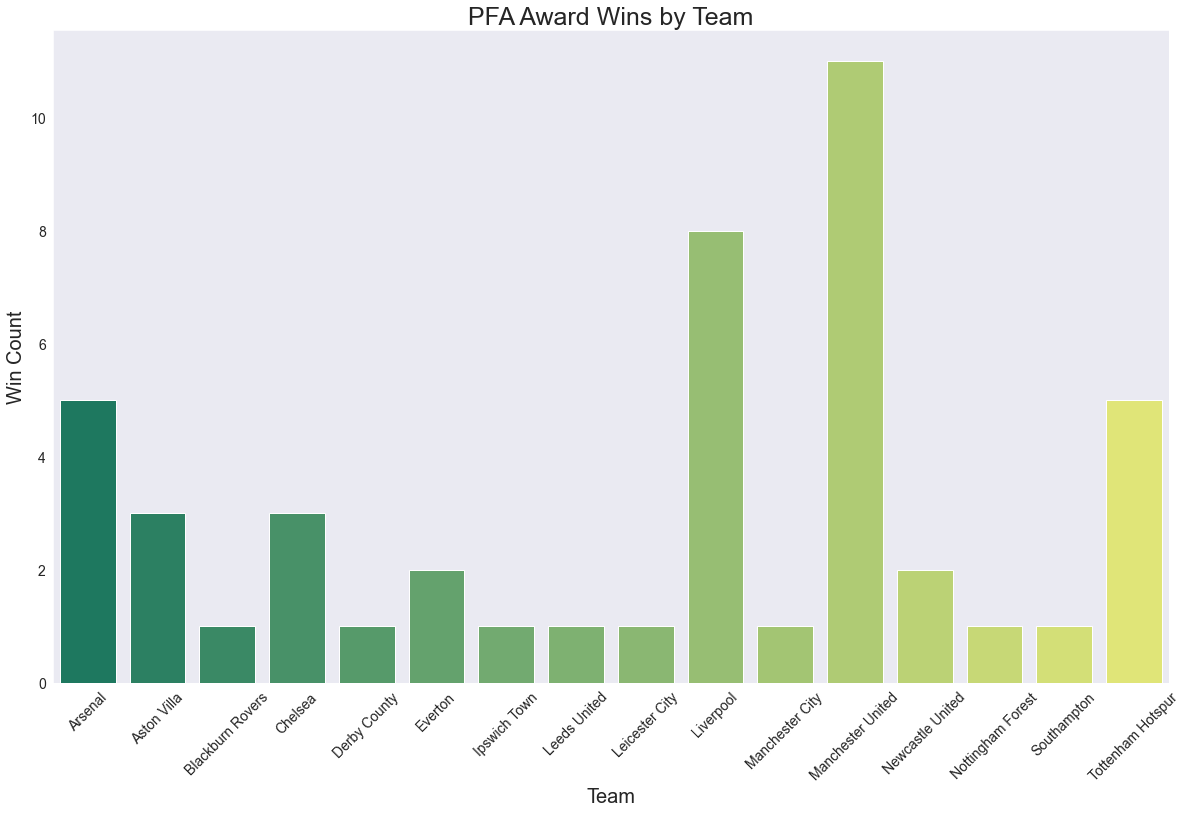

In [79]:
team_winners = pd.read_sql('SELECT * FROM pfa_award_winners', engine)
team_winners = team_winners.groupby('team_name')['team_name'].count()

plt.figure(figsize=(20,12))
sns.set_style("dark")
ax1 = sns.barplot(x=team_winners.index, y=team_winners.values, color = 'tab:green', palette='summer')

ax1.set_ylabel("Win Count", fontsize=20)
ax1.set_xlabel("Team", fontsize=20)
plt.xticks(rotation=45)
ax1.tick_params(labelsize=14)
plt.title('PFA Award Wins by Team', fontsize=25)
plt.savefig('team_wins.png', dpi = 300);

As we can see in Figure 1, the PFA Players Player of the Year Award has only been awarded to players from 16 teams in it's history. Of this group, Manchester United (11 wins) and Liverpool (8 wins) have been the most dominant, Tottenham and Arsenal share the position of 3rd most wins with 5 apiece.

***Figure 2 - Goals vs Possession***

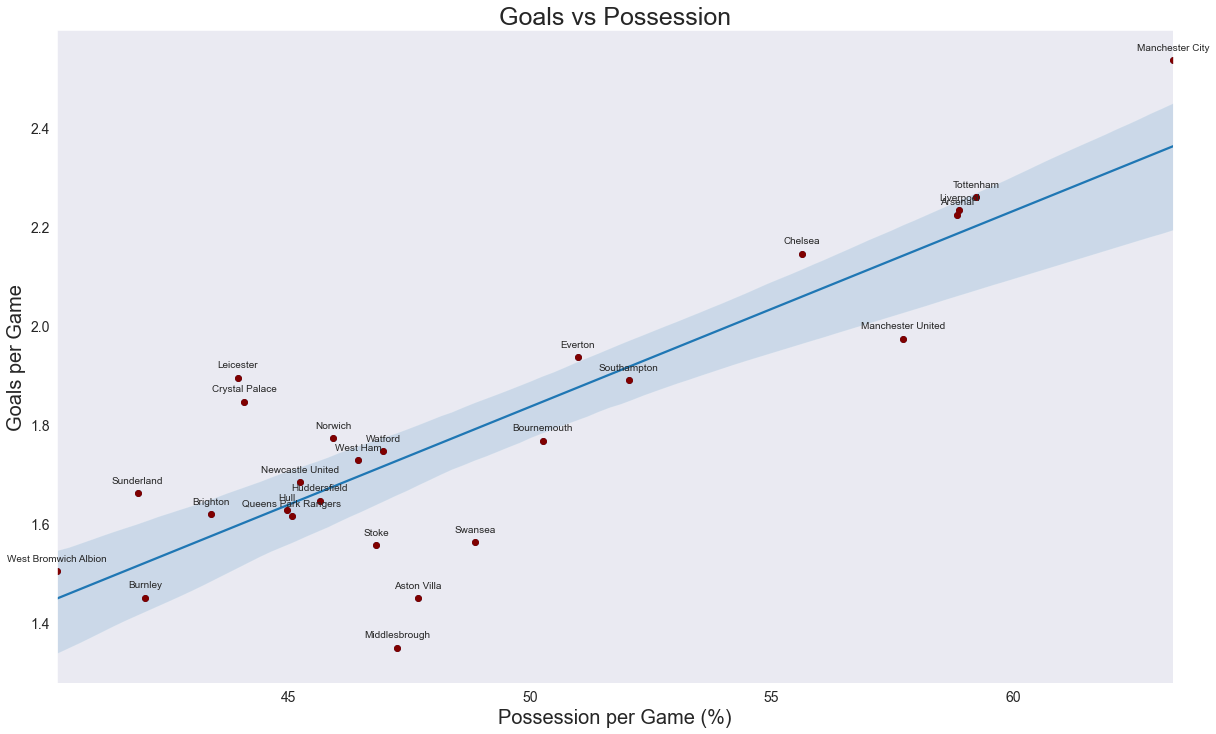

In [80]:
match_details_avg = pd.read_sql('SELECT* FROM match_details', engine)
match_details_avg = match_details_avg.groupby('team_name').mean()
poss = match_details_avg['possession_percentage']
goals = match_details_avg['goals']

plt.figure(figsize=(20,12))
sns.regplot(x='possession_percentage', y='goals', data=match_details_avg)
plt.scatter(poss, goals, c='maroon')

for (i, j, k) in zip(match_details_avg.index, match_details_avg['possession_percentage'], match_details_avg['goals']):
    plt.annotate(i, xy=(j, k), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Goals vs Possession', fontsize=25)
plt.ylabel('Goals per Game', fontsize=20)
plt.xlabel('Possession per Game (%)', fontsize=20)
plt.savefig('goals_possession.png', dpi = 300)
plt.show();

Figure 2 shows the positive correlation between a teams average possession per game and average goals per game. Generally speaking, as a teams possession increases, the liklihood that team will score rises. 

Interestingly, Leicester has far lower possession per game than Everton, yet both teams share a similar average goals per game. This is worth looking into in more detail.

***Leicester and Everton Comparison***

In [81]:
match_details_avg[10:11][['team_id', 'possession_percentage', 'goals','total_pass', 'accurate_pass']]

,team_id,possession_percentage,goals,total_pass,accurate_pass
team_name,,,,,
Leicester,14.0,43.955921,1.895652,365.730263,262.177632


In [82]:
player = pd.read_sql('SELECT * FROM player_performance WHERE player_position_info NOT IN("GK")', engine)
player[player['team_id'] == 14][['total_pass', 'accurate_pass']].describe()

,total_pass,accurate_pass
count,1939.000000,1928.000000
mean,26.290356,19.681535
std,16.334663,13.351588
min,1.000000,1.000000
25%,14.000000,9.000000
50%,24.000000,17.000000
75%,36.000000,27.000000
max,102.000000,87.000000


In [83]:
match_details_avg[7:8][['team_id', 'possession_percentage', 'goals', 'total_pass', 'accurate_pass']]

,team_id,possession_percentage,goals,total_pass,accurate_pass
team_name,,,,,
Everton,31.0,50.992105,1.936364,454.506579,361.598684


In [84]:
player[player['team_id'] == 31][['total_pass', 'accurate_pass']].describe()

,total_pass,accurate_pass
count,1923.000000,1916.000000
mean,33.720749,27.552714
std,20.347003,18.152813
min,1.000000,1.000000
25%,18.000000,13.000000
50%,32.000000,25.000000
75%,48.000000,39.000000
max,115.000000,103.000000


As highlighted, Leicester and Everton share a very similar average goals per game with 1.90 and 1.94 goals respectively. The teams diverge significantly on their tactics towards possession with Leicester averaging just 43.96% possession per game and Everton averaging 50.99%. This is interesting because there is a strong correlation between possession and goals. As shown in Figure 2, teams which have a high possession tend to score more goals. This point is magnified by all of the so called 'Top 6' teams clustering in the top right hand corner of Figure 2.

Leicesters relationship towards possession based football can be partly explained by the quality of passing footballers the team has. When looking at the percentage of accurate passes per game each player completes (player accurate_pass/ total_pass), we find a significant difference with Everton. Leicester players complete an average of 74.86% accurate passes, while Everton players average 81.71%. Perhaps these possession differences still do not read as significantly different, however when looking at the team level they contribute to Everton averaging 99 more accurate passes than Leicester in every game played.

***Figure 3 - Histogram: Goals Scored Home vs Away***

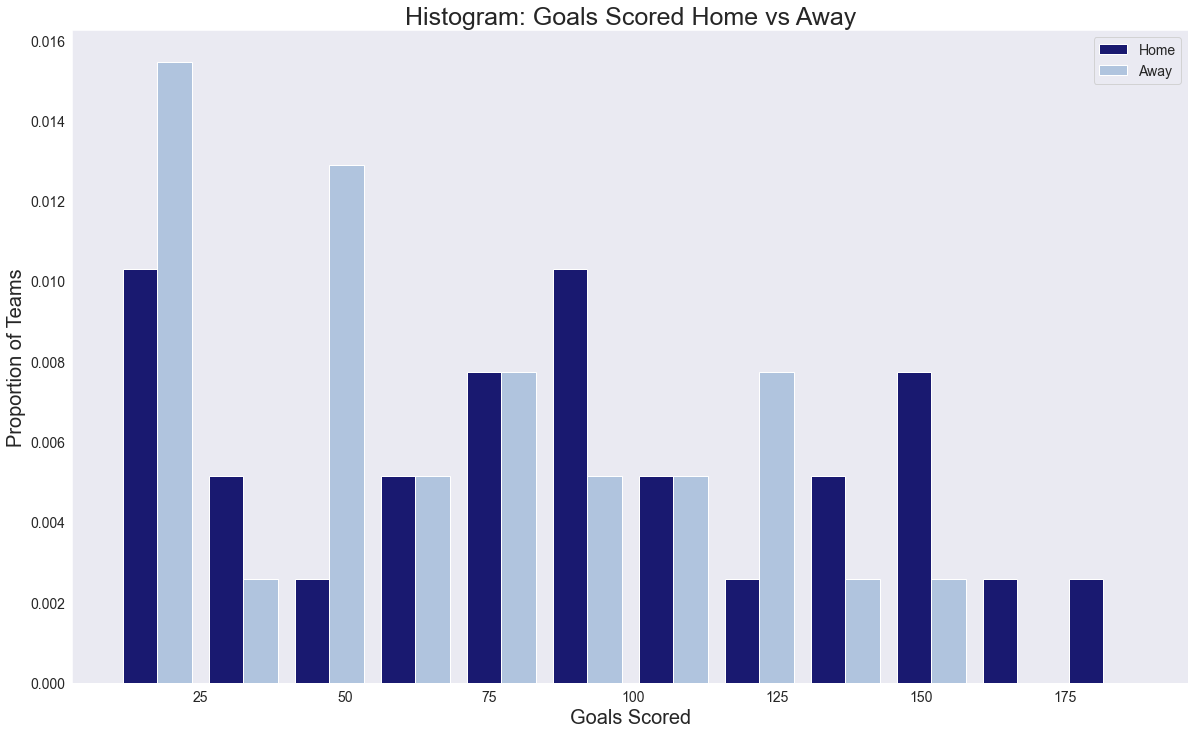

In [85]:
match_results = pd.read_sql('SELECT m.*, d.team_name as home_team, d2.team_name as away_team FROM match_results m JOIN match_details d ON m.match_id = d.match_id AND m.home_team_id = d.team_id JOIN match_details d2 ON m.match_id = d2.match_id AND m.away_team_id = d2.team_id', engine)
h = match_results.groupby('home_team')['home_team_full_time'].sum()
a = match_results.groupby('away_team')['away_team_full_time'].sum()

plt.figure(figsize=[20,12])
plt.hist([h, a], label=['Home', 'Away'], density=True, bins=12, color = ['midnightblue', 'lightsteelblue'])
plt.legend(loc='upper right', fontsize=14)
plt.title('Histogram: Goals Scored Home vs Away', fontsize=25)
plt.xlabel('Goals Scored', fontsize=20)
plt.ylabel('Proportion of Teams', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('goals_hist.png', dpi = 300);

Figure 3 shows the distribution of goals scored by teams home and away. While both distributions are skewed towards the right, a larger proportion of teams are represented in the left tail for away games. In comparison, home matches have a more even distribution and a longer right tail. 

There's a significant proportion of teams that have scored 150+ goals at home over the 4 seasons examined, while very few teams meet this feat in away matches. To summarise, teams are more free scoring in home matches than in away matches. Let's next observe the highest scoring teams home and away. 

***Figure 4 - Highest Scoring Teams Home and Away***

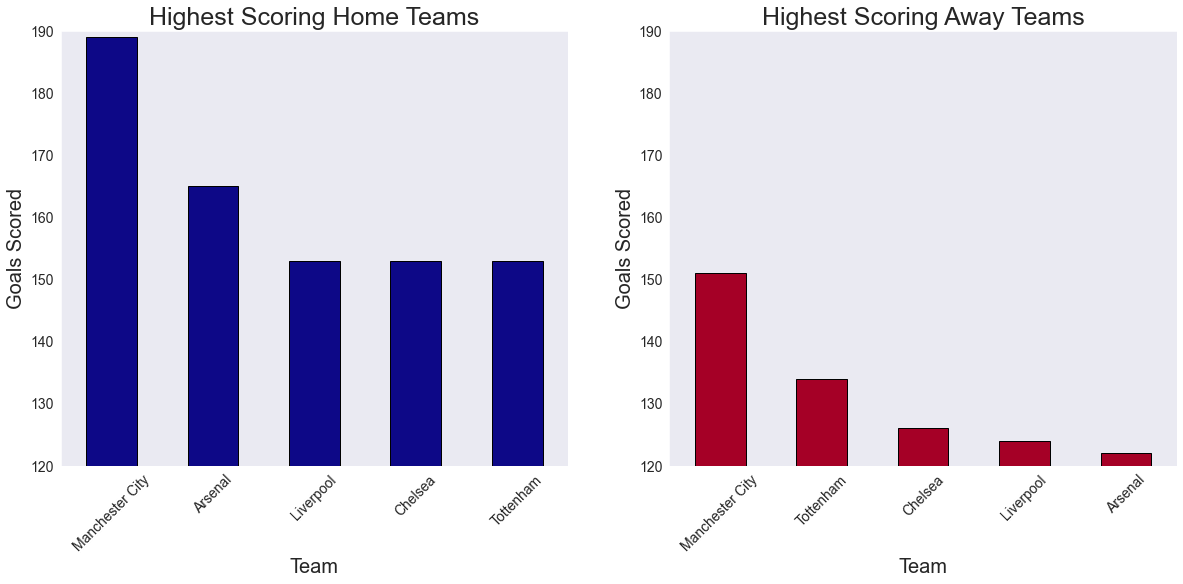

In [86]:
#(DelftStack, 2019)

h = h.sort_values(ascending=False).head(5)
a = a.sort_values(ascending=False).head(5)

plt.figure(figsize = [20, 8])

plt.subplot(1, 2, 1) 
plt.title('Highest Scoring Home Teams', fontsize=25)
h.plot(kind='bar', ylim= [120,190], edgecolor='black', colormap='plasma')
plt.ylabel("Goals Scored", fontsize=20)
plt.xlabel("Team", fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1, 2, 2) 
plt.title('Highest Scoring Away Teams', fontsize=25)
a.plot(kind='bar', ylim= [120,190], edgecolor='black', colormap='RdYlGn')
plt.ylabel("Goals Scored", fontsize=20)
plt.xlabel("Team", fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('home_away_goals.png', dpi = 300);

Manchester City significantly leads the way with the most goals scored home and away between 2014-2018. Although having won the Premier League twice within these years, Chelsea have been outscored by both Tottenham and Manchester City home and away.  

Of the so called 'Top 6' teams, only Manchester United does not feature in Figure 4.

### K-Means Clustering
<a id='k-means'></a>

In this section I will identify the optimum number of cluster groups for the data I have selected. I will then run a K-Means Clustering as a way of assessing the similarities of the attributes of PFA Players' Player of the Year award winners.

***Querying Data***

In [87]:
#Selecting key columns of numerical data
#Removing Goalkeepers as there is not a PFA Award winning goalkeeper in the dataset. Additionally Goalkeepers have unique
    #statistics to outfield players.
#Taking the mean across players match performance for all four years of data, additionally dropping nulls in order to use 
    #K-Means clustering.

player_performance = pd.read_sql('SELECT player_id, player_position_value, touches, total_pass, aerial_won, formation_place, accurate_pass, total_tackle, aerial_lost, fouls, goals, won_contest, blocked_scoring_att, goal_assist FROM player_performance WHERE player_position_info NOT IN("GK")', engine)
player_performance_avg = player_performance.groupby('player_id').mean().dropna()
player_performance_avg.head(5)

,player_position_value,touches,total_pass,aerial_won,formation_place,accurate_pass,total_tackle,aerial_lost,fouls,goals,won_contest,blocked_scoring_att,goal_assist
player_id,,,,,,,,,,,,,
17,3.433333,67.000000,52.793103,1.461538,5.466667,44.862069,2.000000,1.411765,1.222222,1.125,1.000000,1.300000,1.0
48,4.393939,26.781250,21.843750,1.000000,2.545455,18.593750,1.315789,1.200000,1.166667,1.000,1.285714,1.111111,1.0
188,3.232000,64.088710,51.620968,1.863636,4.448000,42.048387,2.704762,1.791667,1.864583,1.000,1.142857,1.111111,1.0
487,4.692308,20.333333,14.583333,1.000000,2.230769,12.250000,1.166667,1.000000,1.333333,1.000,1.000000,1.000000,1.0
845,4.375000,35.333333,29.733333,2.250000,2.500000,25.600000,1.111111,2.000000,1.166667,1.000,2.750000,1.000000,1.0


***Figure 5 - The Elbow Method: Identifying Optimal No. Clusters***

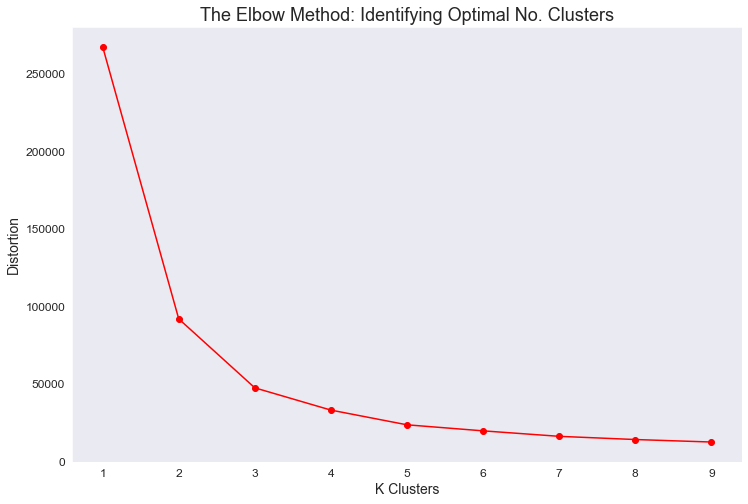

In [88]:
#The Elbow Method is used to determine the optimal number of clusters through assessing the average of the squared distances
    #from the respective centroids
#When the distortions are plotted, we can identify the optimum number of clusters where the plot resembles an elbow
#(Bonaros, 2019)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(player_performance_avg)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(12,8))
sns.set_style("dark")
plt.plot(K, distortions, color='red', marker='o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('K Clusters', fontsize=14)
plt.ylabel('Distortion', fontsize=14)
plt.title('The Elbow Method: Identifying Optimal No. Clusters', fontsize=18)
plt.savefig('elbow.png', dpi = 300)
plt.show()

As can be seen in Figure 5, the elbow or break of the chart is at K Clusters 3. 3 Clusters is therefore the optimal number of centroid when using K-Means Clustering.

***K-Means Clustering***

In [89]:
#I will plug the ideal number of clusters (3) into a K Means model and append to the dataframe
#I have set the random state so that you as the reader will obtain the same result as me when running the code
#(StackExchange, 2019)

km_res = KMeans(n_clusters=3, random_state=42, n_init=1000, max_iter=1001).fit(player_performance_avg[['touches', 'total_pass', 'total_tackle','fouls', 'goals', 'goal_assist']])
player_performance_avg['cluster'] = km_res.labels_

In [90]:
#Let's view the cluster groups for the pfa award winners
#I will select the player id and player name from the award winners subset in SQL in order to join 

pfa_award_winners_subset = pd.read_sql('SELECT player_id, player_name FROM pfa_award_winners_subset', engine)
pfa_award_winners_subset = pd.merge(player_performance_avg, pfa_award_winners_subset, left_index=True, right_on='player_id')
pfa_award_winners_subset

,player_position_value,touches,total_pass,aerial_won,formation_place,accurate_pass,total_tackle,aerial_lost,fouls,goals,won_contest,blocked_scoring_att,goal_assist,cluster,player_id,player_name
0,3.621429,68.503597,48.575540,1.148936,9.635714,41.453237,1.280702,1.541667,1.340909,1.179487,4.438462,1.333333,1.000000,1,33404,Eden Hazard
1,3.242857,53.028777,29.669065,1.386667,6.635714,22.683453,1.877778,2.138889,1.323944,1.181818,2.951613,1.534483,1.080000,2,104749,Riyad Mahrez
3,4.075000,43.051282,24.846154,1.181818,8.250000,19.076923,1.333333,1.400000,1.062500,1.333333,2.666667,1.736842,1.111111,2,108226,Mohamed Salah
2,3.093458,71.009434,53.971698,1.423077,7.130841,47.047170,4.191919,1.780822,1.779221,1.000000,1.688312,1.227273,1.000000,1,114075,N'Golo Kanté


***Figure 6 - Cluster Count***

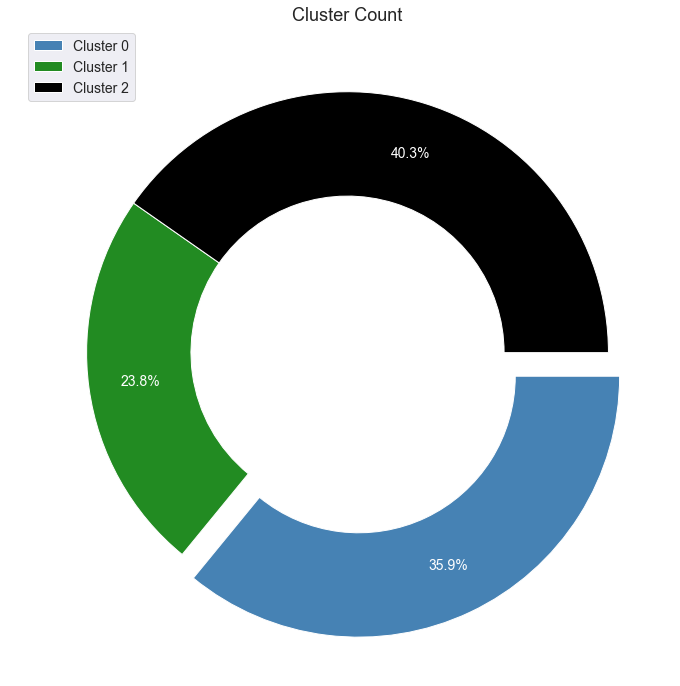

In [91]:
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
sizes = player_performance_avg['cluster'].value_counts(sort=False, normalize=True)
explode = (0.1, 0, 0)  
color=['steelblue','forestgreen','k']

plt.figure(figsize=(12,12))
plt.pie(sizes, labels=labels, textprops={'fontsize': 14, 'color':"w"}, colors=color, explode=explode,
       counterclock = False, wedgeprops = {'width' : 0.4}, autopct='%1.1f%%', pctdistance =0.8)
plt.title('Cluster Count', fontsize=18)
plt.savefig('cluster.png', dpi = 300)
plt.legend(loc='upper left', fontsize=14)
plt.show();

The results of the K-Means clustering finds that the PFA Award winners all fall into a mix of cluster groups 1 and 2. I have shown visually the clustering distribution in the form of a pie chart to highlight that although cluster 0 does not include a PFA Award winner, the group does hold 35.9% of the results.

We can conclude that based upon the input variables selected for the model, I have not been able to find one common clustering group for the award winners as they are evenly split among groups 2 and 3. This may show that there are similarities among the PFA Award Winners, however it is not conclusive. Ideally a study with a larger dataset should be used to complete a meaningful analysis on this topic. 

## Conclusion
<a id='conclusion'></a>

In this report, I first set out to build a relational database which can be used to evaluate both players and teams. To do this I gathered, assessed and cleaned a large JSON dataset and a Wikipedia scraped dataset to create the relational database which includes 4 years of Premier League data at both the player and team level. This completed the Data Wrangling section of the report.

Through assessing the most prolific PFA Player of the Year winners by team, I was able to identify the dominance of players from  Manchester United (11 wins) and Liverpool (8 wins) by querying the database and building a bar chart. This should come with little surprise as these two teams have won the most top flight league titles in English footballing history.

In the Exploratory Analysis, I was able to show a strong relationship between possession based football and goals scored with a scatter plot and linear regression. As a teams match possession increases, so does the likelihood that the team will score. Of course, this is not a rule which holds true with all clubs. When comparing Leicester and Everton with descriptive statistics, both teams were shown to score a very similar amount of goals per game, yet Everton averages a significantly higher amount of possession. This in part can be explained by the quality of passing footballer each team has. When looking into the percentage of accurate passes by player, Everton's footballers were significantly higher than Leicester. In fact, the difference contributed to Everton averaging 99 more accurate passes than Leicester in every game. This is a compelling reason for differing possession tactics. 

When looking into a histogram of goals scored home and away, I was able to show the relative difficulty of scoring goals away from home with a greater proportion of teams in the left tail for away games. However, Manchester City (City) did not face any such difficulty with scoring goals. By charting goals scored home and away for the top 5 teams, I was able to show that City are the only team that has scored 150+ goals both home and away over the 4 years of data analysed. Perhaps more interestingly, although having won the premier league twice within the 4 years assessed, Chelsea were outscored home and away by both Manchester City and Tottenham Hotspur. 

Within the second part of the Data Analysis, I utilised the Elbow Method to identify the optimal number of clusters for the columns of data selected (3). When modelling using K-Means clustering I found that the 4 PFA Award winners were split among clusters 1 and 2. While this may show that there are tangible similarities between the players, an analysis with a larger dataset would be required to confidently conclude that there are shared attributes among PFA award winners. Finally, through using a pie chart I was able to show visually that despite not having a PFA Award winner in cluster 0, there is a significant proportion of results with 35.9% of all players in the grouping.

## Further Study

A clear area for further analysis is the grouping of players using K-Means clustering. My analysis was complete by looking at 4 seasons of in game player statistics. For all players, I took the average of key variables and used these as inputs for the clustering model. The objective was to understand whether there is commonality in the clustering of award winners. 

Although a heavy amount of data was processed, the analysis is concerned with whether the award winners fall into the same clusters and there are just 4 winners in the database to evaluate. A further and more complete study would involve the collection of a greater amount of data which spans several seasons more than what I was able to collect. The PFA Players' Player of the Year award was first introduced in 1974, there is hence a total of 46 seasons that can be used in a K-Means Clustering model. With a wider observation count, the model can be more conclusively used to understand whether award winners share common attributes.

## Limitations
<a id='limit'></a>

**1. pfa_award_winners table:** The pfa_award_winners table does not have a primary/ foreign key and cannot be joined with other tables within the relational database. This is a consequence of limited data and is hence why the pfa_award_winners_subset was created.


**2. Limited data:** A major limitation of the Data Analysis section is the limited amount of data gathered. Unfortunately, I was only able to source 4 years worth of observations at the player level.


**3. K-Means clustering variable selection:** The selection of variables used in the K-Means modelling was largely based upon domain knowledge of football rather than a more scientific and resilient approach to input selection.

## References
<a id='ref'></a>

Bonaros, B., 2019. K-Means Elbow Method Code For Python. [Online] 
Available at: https://predictivehacks.com/k-means-elbow-method-code-for-python/
[Accessed 2020 December 2020].

DelftStack, 2019. Rotate X-Axis Tick Label Text in Matplotlib. [Online] 
Available at: https://www.delftstack.com/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
[Accessed 14 December 2020].

Moffitt, C., 2018. Overview of Pandas Data Types. [Online] 
Available at: https://pbpython.com/pandas_dtypes.html
[Accessed 14 December 2020].

Pawar, S., 2018. English Premier League in-game match data. [Online] 
Available at: https://www.kaggle.com/shubhmamp/english-premier-league-match-data
[Accessed 14 December 2020].

StackExchange, 2019. Perform k-means clustering over multiple columns. [Online] 
Available at: https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns
[Accessed 14 December 2020].

stackoverflow, 2018. Replicating rows in Pandas [duplicate]. [Online] 
Available at: https://stackoverflow.com/questions/50788508/replicating-rows-in-pandas
[Accessed 14 December 2020].

Wikipedia, 2020. PFA Players' Player of the Year. [Online] 
Available at: https://en.wikipedia.org/wiki/PFA_Players%27_Player_of_the_Year
[Accessed 14 December 2020].